## What you need to do is to change MARKER and run all the executable items.

## Step 1. Preprocessing

In [1]:
load(file="sc_NASH_221213.RData")

Registered S3 method overwritten by 'spatstat.core':
  method          from
  formula.glmmPQL MASS



In [2]:
library(Seurat)
library(Matrix)
library(dplyr)
library(ggplot2)
library(rhdf5)
library(ggpubr)
library(plotly)
library(dplyr)

MARKER = 'CD276'

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout




In [2]:
pbmc_trim$seurat_clusters = pbmc_trim$annot

In [13]:
Idents(pbmc_trim) <- pbmc_trim$annot

In [15]:
markers = FindAllMarkers(object = pbmc_trim, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster T cells

Calculating cluster pDCs

Calculating cluster ILC1s

Calculating cluster NK cells

Calculating cluster B cells

Calculating cluster KCs

Calculating cluster Mono/mono-derived cells

Calculating cluster cDC2s

Calculating cluster cDC1s

Calculating cluster Mig cDCs

Calculating cluster Hepatocytes

Calculating cluster Endothelial cells

Calculating cluster Cholangiocytes

Calculating cluster Basophils

Calculating cluster Neutrophils

Calculating cluster Stromal cells



In [16]:
write.csv(markers, "markers.csv")

## Step 2. Plots Generation

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



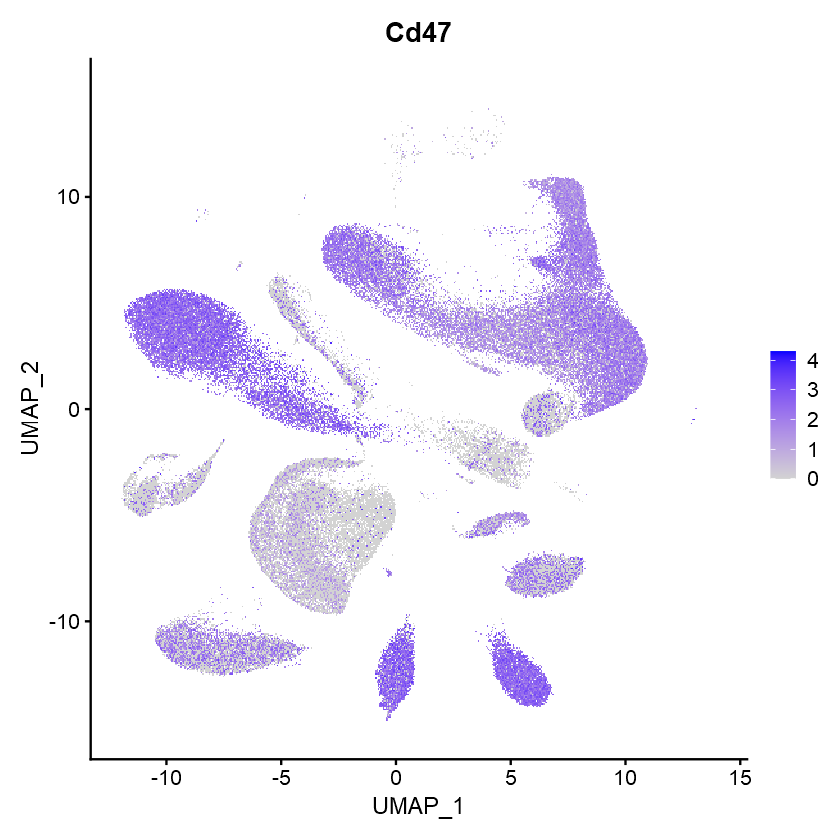

In [26]:
#png(file = "C:/Users/SHAKIL/my plot.png", width = 800, height = 400) # originally width = 800, height = 550

FeaturePlot(pbmc_trim, c(MARKER))

#dev.off()

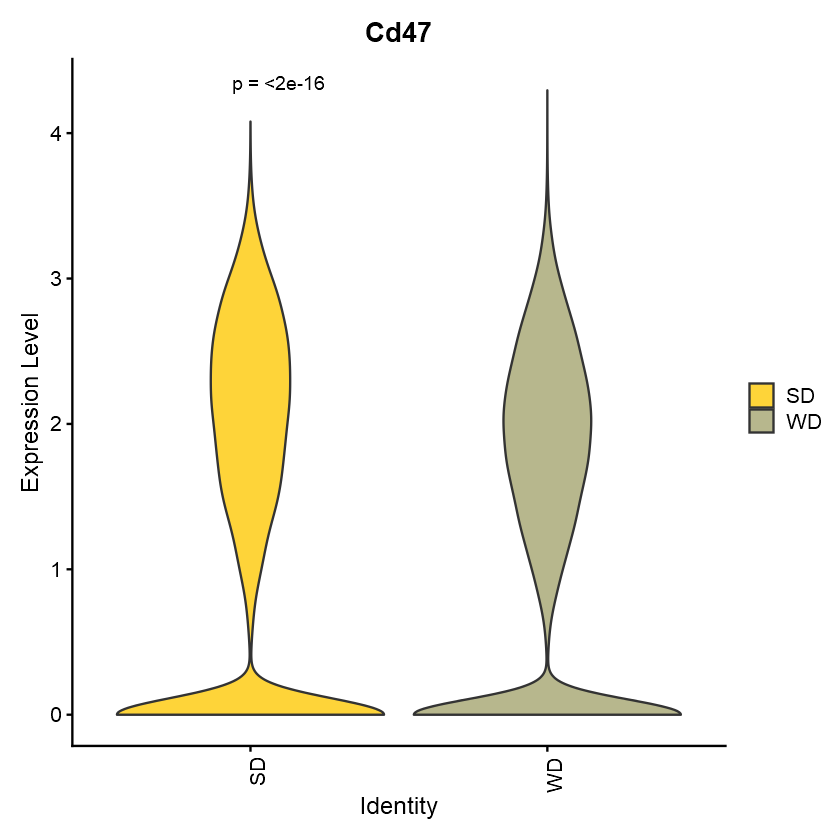

In [33]:
#png(file = "C:/Users/SHAKIL/my plot.png", width = 900, height = 1050) # originally width = 800, height = 550

VlnPlot(object = pbmc_trim, features = c(MARKER),
        group.by = 'diet', 
        pt.size = 0) + 
#    	facet_wrap(.~pbmc$annot, ncol = 1)+
#    	fill_palette(palette='npg')+
        fill_palette(get_palette("simpsons", 31))+
    	stat_compare_means(method = "anova", label='p')+
    	theme(axis.text.x = element_text(angle = 90, hjust = 1),
    	strip.text.x = element_text(size = rel(0.7)))

#dev.off()

In [43]:
png(file = "C:/Users/SHAKIL/my plot.png", width = 500, height = 1500) # originally width = 800, height = 550

VlnPlot(object = pbmc_trim, features = c(MARKER),
        group.by = 'diet', 
        pt.size = 0) + 
    	facet_wrap(.~pbmc_trim$annot, ncol = 1)+
#    	fill_palette(palette='npg')+
        fill_palette(get_palette("simpsons", 31))+
    	stat_compare_means(method = "anova", label='p')+
    	theme(axis.text.x = element_text(angle = 90, hjust = 1),
    	strip.text.x = element_text(size = rel(0.7)))

dev.off()

png 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



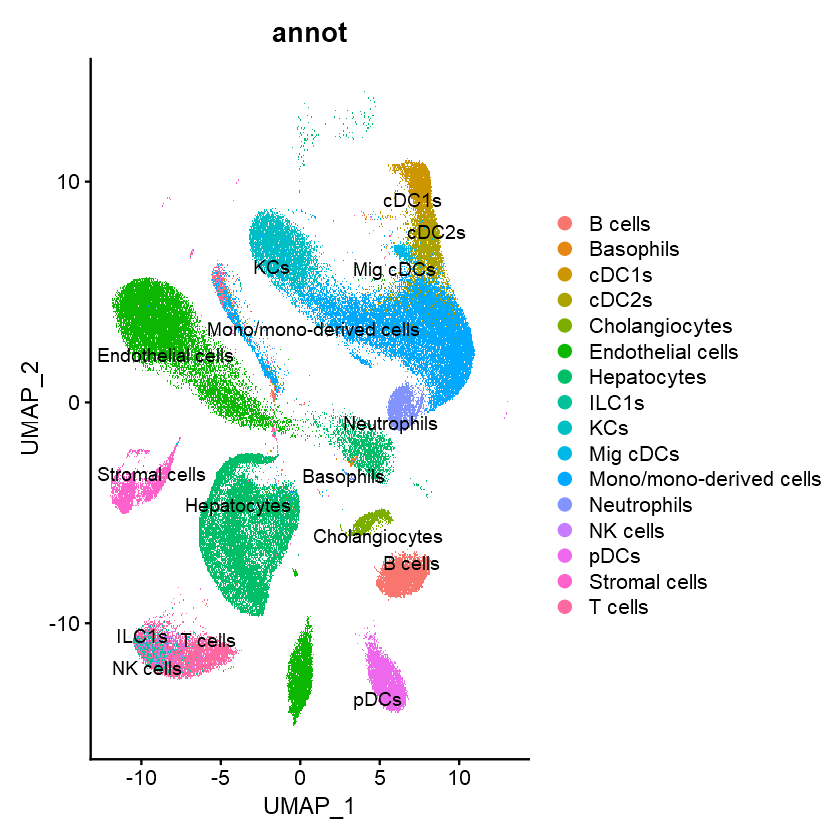

In [27]:
DimPlot(pbmc_trim, reduction = "umap", label = TRUE, repel = TRUE, group.by = 'annot')     

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



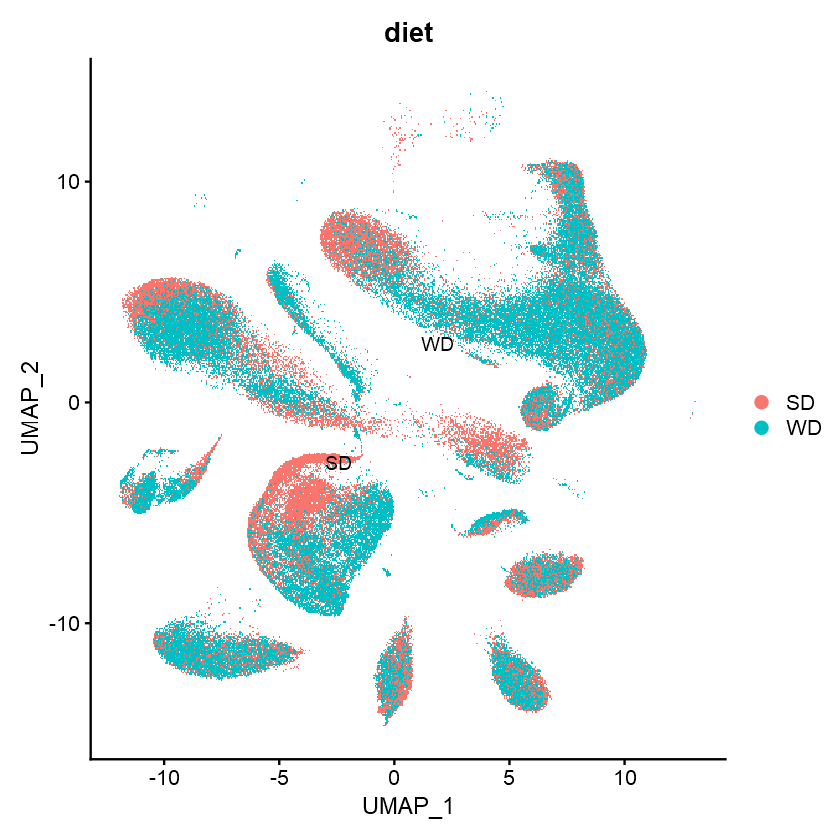

In [28]:
DimPlot(pbmc_trim, reduction = "umap", label = TRUE, repel = TRUE, group.by = 'diet')     

In [3]:
#png(file = "C:/Users/SHAKIL/my plot.png", width = 1500, height = 500) # originally width = 800, height = 550

VlnPlot(object = pbmc_trim, features = c(MARKER),
        group.by = 'annot', 
        pt.size = 0) + 
    	facet_wrap(.~pbmc_trim$diet, ncol = 1)+
#    	fill_palette(palette='npg')+
        fill_palette(get_palette("simpsons", 31))+
    	stat_compare_means(method = "anova", label='p')+
    	theme(axis.text.x = element_text(angle = 90, hjust = 1),
    	strip.text.x = element_text(size = rel(0.7)))

#dev.off()

ERROR: Error in FetchData(object = object, vars = features, slot = slot): None of the requested variables were found: CD276


In [30]:
df<- as.data.frame(table(pbmc_trim$annot, pbmc_trim$diet))

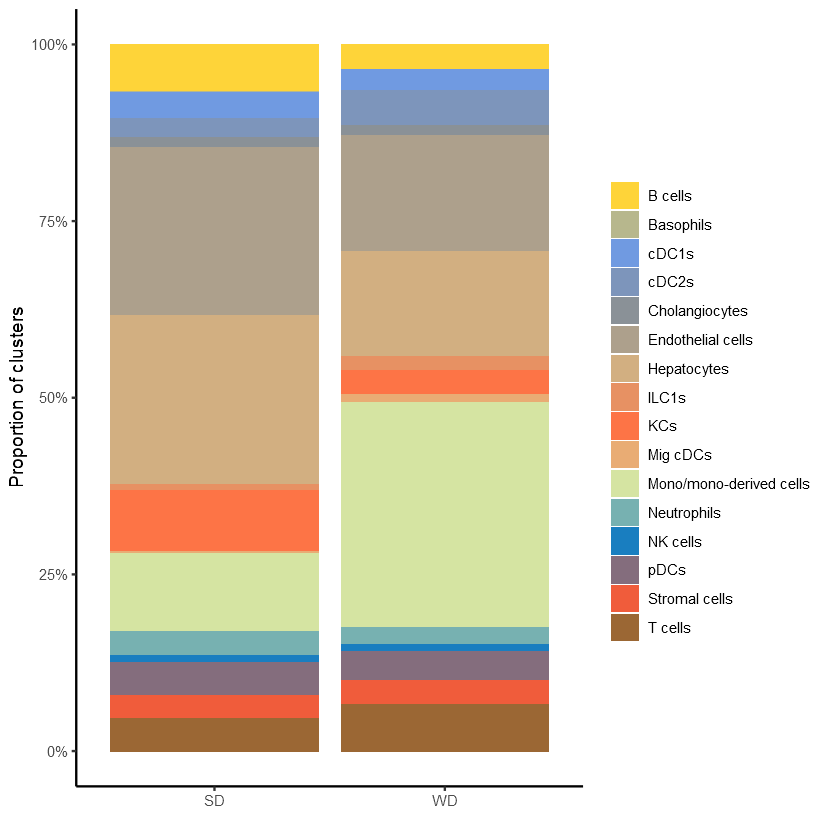

In [31]:
#png(file = "C:/Users/SHAKIL/my plot.png", width = 800, height = 550)
ggplot(df, aes(x =Var2, y = Freq, fill = Var1)) + 
  geom_bar(position = "fill",stat = "identity") + 
  scale_y_continuous(labels = scales::percent_format()) +
  labs(x = '', fill="", y= 'Proportion of clusters')+
  fill_palette(get_palette("simpsons", 31))+
  theme_classic()
#dev.off()

## Step 3. RData Generation

In [42]:
save.image(file="sc_NASH_221213.RData") 

In [ ]:
load(file="sc_NASH_221213.RData")